In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, auc, precision_recall_curve, f1_score
from prettytable import PrettyTable

#Disable annoying warnings
warnings.filterwarnings("ignore")
#Split data(X+y) with stratify (EGV)
X = np.array(pd.read_csv('CAX_Features_Selection.csv'))
y = np.array(pd.read_csv('CAX_Preprocessed_Target_ADA.csv'))
data = np.concatenate((X,y),axis=1)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=y)
train_X = train_data[:,0:12]
test_X = test_data[:,0:12]
train_y = np.reshape(train_data[:,12],(377,1))
test_y = np.reshape(test_data[:,12],(95,1))

#### K-Nearest Neighbor

In [2]:
n_neighbors = list(range(1, 30))
metric = ['euclidean', 'manhattan', 'minkowski']

knn_parameters = {'n_neighbors':n_neighbors, 'metric':metric}

knn = KNeighborsClassifier()
clf_knn = GridSearchCV(estimator=knn, param_grid=knn_parameters, scoring='precision_macro', cv=10)
clf_knn.fit(train_X, train_y)
y_predicted_knn = clf_knn.predict(test_X)
p_knn_test = precision_score(test_y, y_predicted_knn, average='macro')

print('Best n_neighbors:', clf_knn.best_estimator_.get_params()['n_neighbors'])
print('Best metric:', clf_knn.best_estimator_.get_params()['metric'])
print(p_knn_test)

Best n_neighbors: 29
Best metric: euclidean
0.8709226467847158


#### Naive Bayes

In [3]:
alpha = list(np.arange(0.001, 5, 0.001))

nb_parameters = {'alpha':alpha}

nb = MultinomialNB()
clf_nb = GridSearchCV(estimator=nb, param_grid=nb_parameters, scoring='precision_macro', cv=10)
clf_nb.fit(train_X, train_y)
y_predicted_nb = clf_nb.predict(test_X)
p_nb_test = precision_score(test_y, y_predicted_nb, average='macro')

print('Best alpha:', clf_nb.best_estimator_.get_params()['alpha'])
print(p_nb_test)

Best alpha: 4.724
0.7835595776772247


#### Logistic Regression

In [4]:
penalty = ['l1','l2', 'elasticnet', 'none']
c_lr = list(np.arange(0.1, 3, 0.01))
solvers = ['newton-cg', 'lbfgs', 'liblinear']

lr_parameters = {'penalty':penalty,'C':c_lr, 'solver':solvers, 'random_state':[42]}

lr = LogisticRegression()
clf_lr = GridSearchCV(estimator=lr, param_grid=lr_parameters, scoring='precision_macro', cv=10)
clf_lr.fit(train_X, train_y)
y_predicted_lr = clf_lr.predict(test_X)
p_lr_test = precision_score(test_y, y_predicted_lr, average='macro')

print('Best penalty:', clf_lr.best_estimator_.get_params()['penalty'])
print('Best C:', clf_lr.best_estimator_.get_params()['C'])
print('Best solvers:', clf_lr.best_estimator_.get_params()['solver'])
print(p_lr_test)

Best penalty: l1
Best C: 1.5799999999999994
Best solvers: liblinear
0.8294232649071358


#### Decision Tree

In [5]:
criterion = ["gini", "entropy"]
max_depth_dt = list(np.arange(1,5,1))
max_features_dt = [1, 2, 3, 4, 5, 6, 'auto', 'sqrt', 'log2', None]

dt_parameters = {'criterion':criterion, 'max_depth':max_depth_dt,
                 'max_features':max_features_dt, 'random_state':[42]}

dt = DecisionTreeClassifier()
clf_dt = GridSearchCV(estimator=dt, param_grid=dt_parameters, scoring='precision_macro', cv=10)
clf_dt.fit(train_X, train_y)
y_predicted_dt = clf_dt.predict(test_X)
p_dt_test = precision_score(test_y, y_predicted_dt, average='macro')

print('Best criterion:', clf_dt.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_dt.best_estimator_.get_params()['max_depth'])
print('Best max_features:', clf_dt.best_estimator_.get_params()['max_features'])
print(p_dt_test)

Best criterion: entropy
Best max_depth: 4
Best max_features: 4
0.8266542404473439


#### Support Vector Machine

In [6]:
c_sv = list(np.arange(0.001, 0.1, 0.001))
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_sv = ['scale', 'auto']

sv_parameters = {'C':c_sv,'kernel':kernel, 'gamma':gamma_sv, 'random_state':[42]}

sv = SVC()
clf_sv = GridSearchCV(estimator=sv, param_grid=sv_parameters, scoring='precision_macro', cv=10)
clf_sv.fit(train_X, train_y)
y_predicted_sv = clf_sv.predict(test_X)
p_sv_test = precision_score(test_y, y_predicted_sv, average='macro')

print('Best C:', clf_sv.best_estimator_.get_params()['C'])
print('Best kernel:', clf_sv.best_estimator_.get_params()['kernel'])
print('Best gamma:', clf_sv.best_estimator_.get_params()['gamma'])
print(p_sv_test)

Best C: 0.064
Best kernel: rbf
Best gamma: scale
0.8346560846560847


#### Random Forest

In [7]:
criterion_rf = ["gini", "entropy"]
max_depth_rf = list(np.arange(1, 5, 1))
max_features_rf = [1, 2, 3, 4, 5, 'auto', 'sqrt', 'log2', None]

rf_parameters = {'criterion':criterion_rf, 'max_depth':max_depth_rf,
                 'max_features':max_features_rf, 'random_state':[42]}

rf = RandomForestClassifier()
clf_rf = GridSearchCV(estimator=rf, param_grid=rf_parameters, scoring='precision_macro', cv=10)
clf_rf.fit(train_X, train_y)
y_predicted_rf = clf_rf.predict(test_X)
p_rf_test = precision_score(test_y, y_predicted_rf, average='macro')

print('Best criterion:', clf_rf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_rf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', clf_rf.best_estimator_.get_params()['max_features'])
print(p_rf_test)

Best criterion: gini
Best max_depth: 4
Best max_features: 2
0.880796370967742


#### Extreme Gradient Boosting

In [8]:
eta = list(np.arange(0.5, 1, 0.1))
max_depth_eg = list(np.arange(1, 5, 1))
gamma_eg = list(np.arange(1, 5, 1))
lambda_eg = list(np.arange(0.5, 1, 0.1))
alpha_eg = list(np.arange(0.5, 1, 0.1))

eg_parameters = {'eta':eta,
                 'max_depth':max_depth_eg,
                 'gamma':gamma_eg,
                 'lambda':lambda_eg,
                 'alpha':alpha_eg,
                 'random_state':[42], 'objective':['reg:logistic']}

eg = xgb.XGBClassifier()
clf_eg = GridSearchCV(estimator=eg, param_grid=eg_parameters, scoring='precision_macro', cv=10)
clf_eg.fit(train_X, train_y)
y_predicted_eg = clf_eg.predict(test_X)
p_eg_test = precision_score(test_y, y_predicted_eg, average='macro')

print('Best eta:', clf_eg.best_estimator_.get_params()['eta'])
print('Best max_depth:', clf_eg.best_estimator_.get_params()['max_depth'])
print('Best gamma:', clf_eg.best_estimator_.get_params()['gamma'])
print('Best lambda:', clf_eg.best_estimator_.get_params()['lambda'])
print('Best alpha:', clf_eg.best_estimator_.get_params()['alpha'])
print(p_eg_test)

Best eta: 0.6
Best max_depth: 4
Best gamma: 1
Best lambda: 0.6
Best alpha: 0.8999999999999999
0.8758553274682307


##### Bagging Classifier

In [9]:
base_estimator = [KNeighborsClassifier(n_neighbors=29, metric='euclidean'),
                  MultinomialNB(alpha=4.724),
                  LogisticRegression(penalty='l1', C=1.58, solver='liblinear', random_state=42),
                  DecisionTreeClassifier(criterion = 'entropy', max_depth=4, max_features=4, random_state=42),
                  SVC(C=0.064, kernel='rbf', gamma='scale', random_state=42)]

bc_parameters = {'base_estimator':base_estimator,
                 'random_state':[42]}

bc = BaggingClassifier()
clf_bc = GridSearchCV(estimator=bc, param_grid=bc_parameters, scoring='precision_macro', cv=10)
clf_bc.fit(train_X, train_y)
y_predicted_bc = clf_bc.predict(test_X)
p_bc_test = precision_score(test_y, y_predicted_bc, average='macro')

print('Best base_estimator:', clf_bc.best_estimator_.get_params()['base_estimator'])
print(p_bc_test)

Best base_estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
0.8167791706846672


#### Table Comparison

In [10]:
results = PrettyTable()
results.field_names = ['Model', ' Macro Precision (%)']
results.add_row(['K-Nearest Neighbors', format(p_knn_test*100,'.4f')])
results.add_row(['Naive Bayes', format(p_nb_test*100,'.4f')])
results.add_row(['Logistic Regression', format(p_lr_test*100,'.4f')])
results.add_row(['Decision Tree', format(p_dt_test*100,'.4f')])
results.add_row(['Support Vector Machine', format(p_sv_test*100,'.4f')])
results.add_row(['Random Forest', format(p_rf_test*100,'.4f')])
results.add_row(['Extreme Gradient Boosting', format(p_eg_test*100,'.4f')])
results.add_row(['Bagging Classifier', format(p_bc_test*100,'.4f')])
lines = results.get_string()
with open('Precision Score', 'w') as w:
    w.write(str(lines))
print(results)

+---------------------------+----------------------+
|           Model           |  Macro Precision (%) |
+---------------------------+----------------------+
|    K-Nearest Neighbors    |       87.0923        |
|        Naive Bayes        |       78.3560        |
|    Logistic Regression    |       82.9423        |
|       Decision Tree       |       82.6654        |
|   Support Vector Machine  |       83.4656        |
|       Random Forest       |       88.0796        |
| Extreme Gradient Boosting |       87.5855        |
|     Bagging Classifier    |       81.6779        |
+---------------------------+----------------------+


#### Precision-Recall Curve Comparison

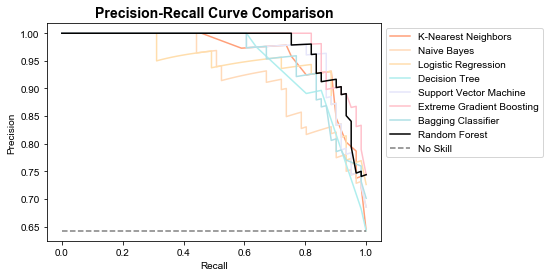

In [11]:
models = [{'label':'K-Nearest Neighbors',
           'model':KNeighborsClassifier(n_neighbors=29, metric='euclidean'),
           'color':'lightsalmon'},
          {'label':'Naive Bayes',
           'model':MultinomialNB(alpha= 4.724),
           'color':'peachpuff'},
          {'label':'Logistic Regression',
           'model':LogisticRegression(penalty='l1', C=1.58, solver='liblinear', random_state=42),
           'color':'navajowhite'},
          {'label':'Decision Tree',
           'model':DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4, random_state=42),
           'color':'paleturquoise'},
          {'label':'Support Vector Machine',
           'model':SVC(C=0.064, kernel='rbf', gamma='scale', probability=True, random_state=42),
           'color':'lavender'},
          {'label':'Extreme Gradient Boosting',
           'model':xgb.XGBClassifier(eta= 0.6, max_depth=4, gamma=1, reg_lambda=0.6, reg_alpha=0.9, random_state=42),
           'color':'pink'},
          {'label':'Bagging Classifier',
           'model':BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4, random_state=42), random_state=42),
           'color':'powderblue'},
          {'label':'Random Forest',
           'model':RandomForestClassifier(criterion='gini', max_depth=4, max_features=2, random_state=42),
           'color':'black'},]

for m in models:
    model = m['model']
    model.fit(train_X, train_y)
    proba_y = model.predict_proba(test_X)[::,1]
    precision, recall, _ = precision_recall_curve(test_y, proba_y)
    plt.plot(recall, precision, label=m['label'], color=m['color'])


no_skill = len(test_y[test_y==1]) / len(test_y)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill', color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1, 1), loc='medium left', prop={'size':10})
plt.style.use('seaborn-white')
plt.title('Precision-Recall Curve Comparison', fontweight="bold", size=14)
plt.gcf().savefig('Precision-Recall curve.png', dpi=800, bbox_inches='tight', pad_inches=0.5)
plt.show()
